In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTETomek
import pickle as pkl
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
df=pd.read_csv('Dataset_spine.csv')

In [6]:
df.shape

(310, 13)

In [7]:
df

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [8]:
df.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


# Data Analysis

In [9]:
df=df.drop('Unnamed: 13',axis=1)

KeyError: "['Unnamed: 13'] not found in axis"

In [11]:
df.columns=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Class']

In [12]:
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [13]:
df.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Class                       0
dtype: int64

# Finding Outliers

In [14]:
plot=df.drop(['Class'],axis=1)

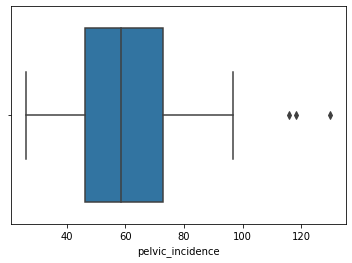

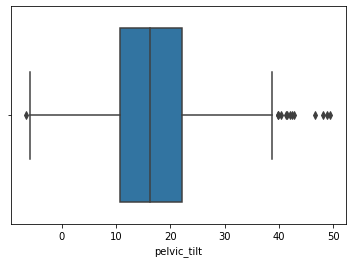

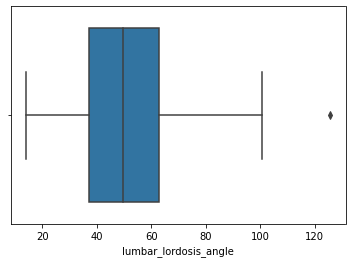

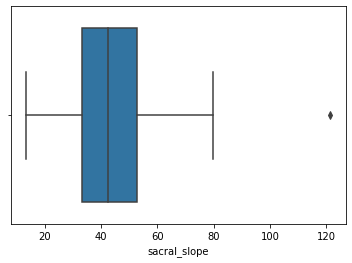

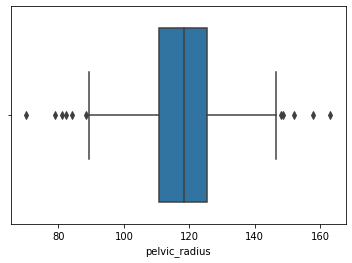

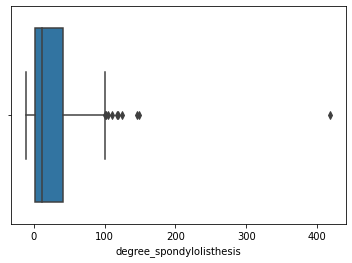

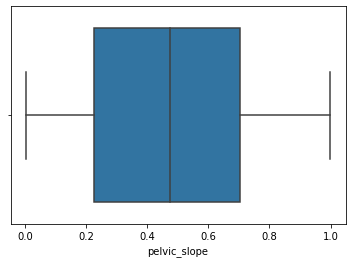

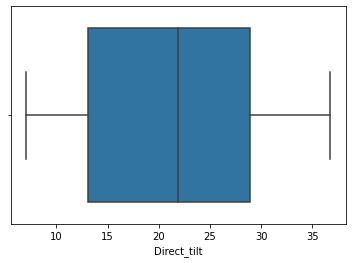

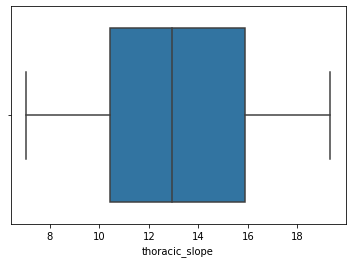

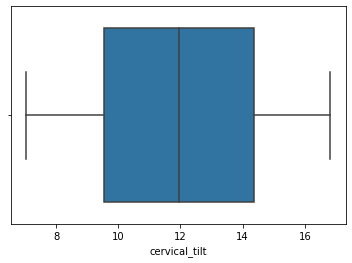

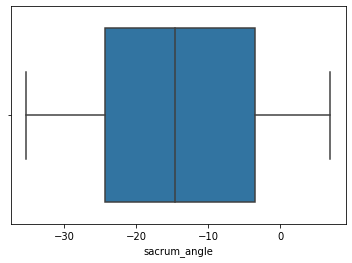

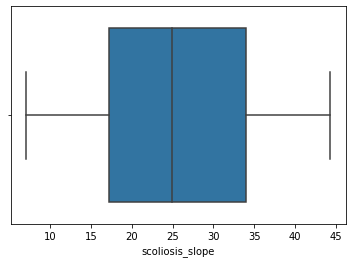

In [15]:
for i in plot:
    sns.boxplot(df[i])
    plt.show()

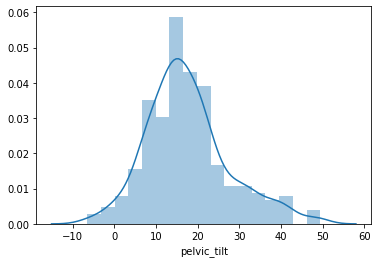

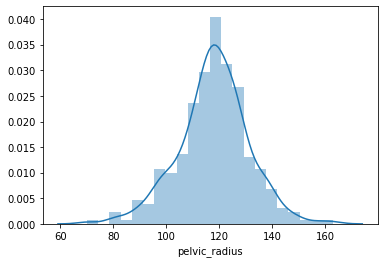

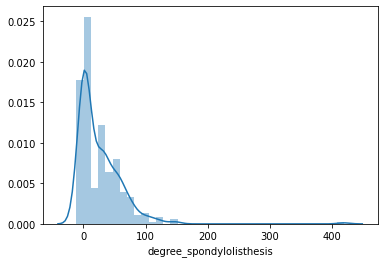

In [16]:
#pelvic_tilt,pelvic_radius,degree_spondylolisthesis this features have the outliers
sns.distplot(df['pelvic_tilt'])
plt.show()
sns.distplot(df['pelvic_radius'])
plt.show()
sns.distplot(df['degree_spondylolisthesis'])
plt.show()

# Replacing Outliers

In [17]:
def find_outliers(feature):
    mean=df[feature].mean()
    std=df[feature].std()
    out=[]
    for i in df[feature]:
        value=(i-mean)/std
        if value>3:
            out.append(i)
    return out

In [18]:
def replace_outliers(out,feature):
    minv=min(out)
    std=df[feature].std()*3+df[feature].mean()
    df[feature]=np.where(df[feature]>=minv,std,df[feature])

In [19]:
out=find_outliers('pelvic_tilt')
out1=find_outliers('pelvic_radius')
out2=find_outliers('degree_spondylolisthesis')
replace_outliers(out,'pelvic_tilt')
replace_outliers(out1,'pelvic_radius')
replace_outliers(out2,'degree_spondylolisthesis')

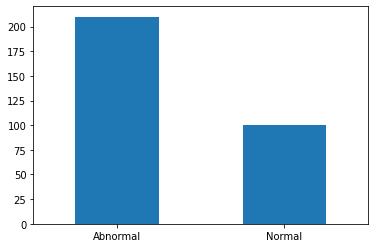

In [20]:
df['Class'].value_counts().plot(kind='bar',rot=0)

In [21]:
X=df.drop('Class',axis=1)
y=df['Class']

In [22]:
smt=SMOTETomek()
X_res,y_res=smt.fit_resample(X,y)

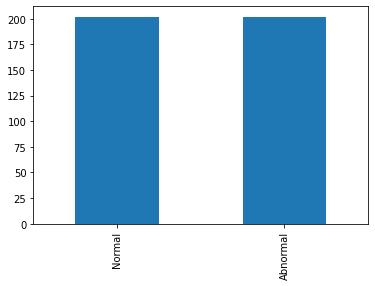

In [23]:
y_res.value_counts().plot(kind='bar')

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=0)

In [25]:
model=LogisticRegression(max_iter=1200000)

In [26]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1200000)

In [61]:
y_pred=model.predict(X_test)

In [62]:
confusion_matrix(y_test,y_pred)

array([[31, 13],
       [ 5, 34]])

In [63]:
y_test.value_counts()

Abnormal    44
Normal      39
Name: Class, dtype: int64

In [64]:
accuracy_score(y_test,y_pred)

0.7831325301204819

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Abnormal       0.86      0.70      0.78        44
      Normal       0.72      0.87      0.79        39

    accuracy                           0.78        83
   macro avg       0.79      0.79      0.78        83
weighted avg       0.80      0.78      0.78        83



In [66]:
model.predict_proba(X_test)

array([[1.12547824e-01, 8.87452176e-01],
       [9.97539943e-01, 2.46005744e-03],
       [2.80579481e-02, 9.71942052e-01],
       [3.57718846e-01, 6.42281154e-01],
       [6.08866764e-03, 9.93911332e-01],
       [1.34330779e-01, 8.65669221e-01],
       [9.96704743e-01, 3.29525669e-03],
       [1.70569362e-01, 8.29430638e-01],
       [2.75030857e-01, 7.24969143e-01],
       [1.78376545e-02, 9.82162346e-01],
       [8.88278311e-01, 1.11721689e-01],
       [9.11384521e-01, 8.86154786e-02],
       [2.55811748e-01, 7.44188252e-01],
       [9.99999999e-01, 6.01539593e-10],
       [6.79134546e-02, 9.32086545e-01],
       [9.99999410e-01, 5.89537240e-07],
       [6.66477392e-01, 3.33522608e-01],
       [9.99992484e-01, 7.51621930e-06],
       [9.03007076e-01, 9.69929244e-02],
       [1.00000000e+00, 3.59904222e-10],
       [4.73754376e-02, 9.52624562e-01],
       [3.54905008e-01, 6.45094992e-01],
       [7.52712114e-02, 9.24728789e-01],
       [2.40333493e-01, 7.59666507e-01],
       [9.995620

In [68]:
with open('model_backpain.pkl','wb') as f:
    pkl.dump(model,f)